# Random Forest with Balanced Weighting - Scalar

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


In [3]:
def rf_weighted_grid_search_cv(X, y, cv_folds=5):
    """
    Perform grid search cross-validation for Random Forest classifier on the given data.
    
    Parameters:
    - X: Features dataset.
    - y: Target variable dataset.
    - cv_folds: Number of folds for cross-validation.
    
    Returns:
    - grid_search: The fitted GridSearchCV object.
    """
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)
    
    # Define a pipeline with the classifier
    pipeline = Pipeline([
        ('rf', RandomForestClassifier(random_state=23, class_weight='balanced'))  # Random Forest classifier with adjusted class weighting
    ])
    
    param_grid = {
        'rf__n_estimators': [50, 150, 200],  # Number of trees in the forest
        'rf__max_features': ['sqrt', 'log2', None],  # The number of features to consider when looking for the best split
        'rf__max_depth': [None, 10, 20, 30],  # Maximum number of levels in each decision tree
        'rf__min_samples_split': [2, 5, 10],  # Minimum number of data points placed in a node before the node is split
        'rf__class_weight': ['balanced', 'balanced_subsample']  # Adjust weights inversely proportional to class frequencies
    }
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=cv_folds, scoring='accuracy', verbose=3, n_jobs=-1)
    
    # Perform grid search cross-validation
    grid_search.fit(X_train, y_train)
    
    print("Best parameters found: ", grid_search.best_params_)
    print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
    
    # Optionally, evaluate on the test set
    test_score = grid_search.score(X_test, y_test)
    print("Test set score: {:.2f}".format(test_score))
    
    return grid_search

# Import training dataset

In [4]:
train_df_scalar = pd.read_pickle('/Users/erin/Documents/comp-viz/final-project/fabric/pkls/train_0406_scalar_non-aug.pkl')
train_df_scalar.head()

,label,category,0,1,2,3,4,5,6,7,...,22,23,24,25,26,27,28,29,30,31
0,0,Blended,3441.793288,2.028531e+07,1844.056770,0.150226,346.120911,0.005210,0.000093,0.000063,...,0.027344,0.054688,0.035156,0.039062,0.031250,0.027344,0.046875,0.062500,0.050781,0.050781
1,1,Denim,7211.992783,7.747671e+06,2271.840993,0.151475,348.998260,0.004833,-0.000067,0.000038,...,0.100000,0.048649,0.021622,0.024324,0.013514,0.021622,0.024324,0.043243,0.016216,0.070270
2,2,Polyester,8856.756862,5.854463e+06,1967.259618,0.160454,369.684998,0.002032,-0.000002,0.000008,...,0.027778,0.004630,0.004630,0.250000,0.129630,0.194444,0.018519,0.004630,0.027778,0.004630
3,0,Blended,7018.112788,7.817569e+06,1953.124972,0.152300,350.899200,0.004582,0.000011,0.000034,...,0.052239,0.063433,0.052239,0.007463,0.022388,0.044776,0.085821,0.074627,0.033582,0.029851
4,3,Cotton,7932.263905,6.971318e+06,2053.412469,0.157971,363.965454,0.002823,-0.000003,0.000017,...,0.030612,0.047619,0.054422,0.047619,0.051020,0.081633,0.013605,0.044218,0.047619,0.054422


# Run random forest model with equal balance on class weights using scalar features

In [5]:
X_sc = train_df_scalar.iloc[:,2:]
y_sc = train_df_scalar.iloc[:,0]

cv_params_scalar = rf_weighted_grid_search_cv(X_sc, y_sc)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 4/5] END rf__class_weight=balanced, rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_split=2, rf__n_estimators=50;, score=0.691 total time=   2.8s
[CV 1/5] END rf__class_weight=balanced, rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_split=2, rf__n_estimators=50;, score=0.675 total time=   2.9s
[CV 3/5] END rf__class_weight=balanced, rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_split=2, rf__n_estimators=50;, score=0.689 total time=   2.9s
[CV 2/5] END rf__class_weight=balanced, rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_split=2, rf__n_estimators=50;, score=0.701 total time=   3.0s
[CV 5/5] END rf__class_weight=balanced, rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_split=2, rf__n_estimators=50;, score=0.677 total time=   3.2s
[CV 1/5] END rf__class_weight=balanced, rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_split=5, rf__n_estimators=50;, s

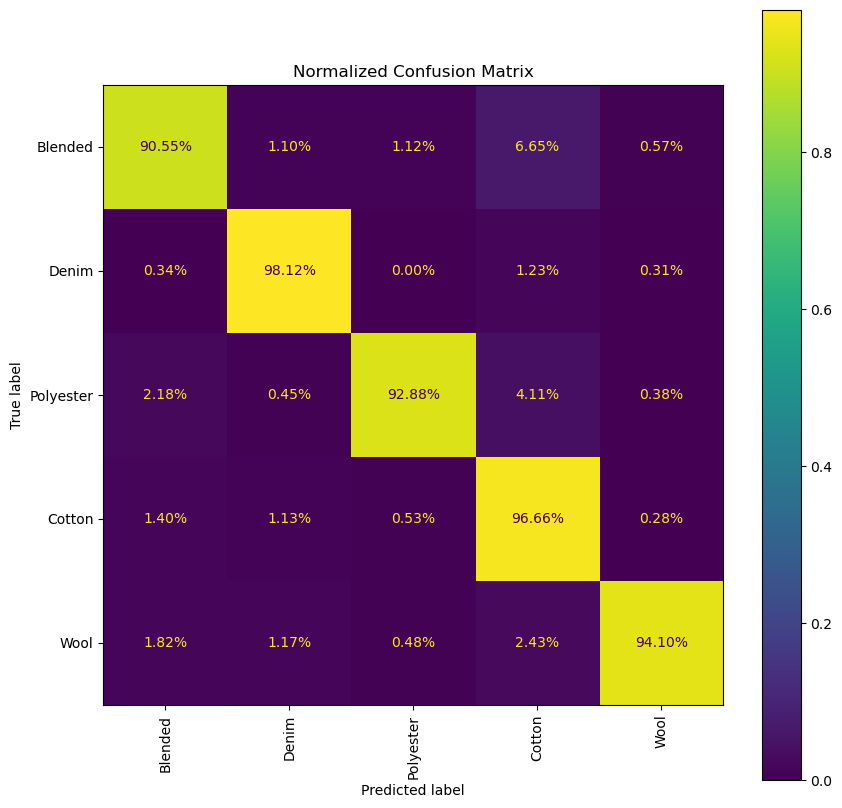

In [7]:
# Assuming X_test and y_test are available from the function; otherwise, split your dataset similarly outside the function
y_pred = cv_params_scalar.best_estimator_.predict(X_sc)

# Compute confusion matrix
cm = confusion_matrix(y_sc, y_pred)

# Normalize the confusion matrix by row (i.e., by the number of samples in each actual class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

class_names = ['Blended', 'Denim', 'Polyester', 'Cotton', 'Wool']

# Plot normalized confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the figure size as necessary
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=class_names)

# To display percentage values in the plot, you need to enable include_values=True and adjust the formatting accordingly
disp.plot(include_values=True, cmap='viridis', ax=ax, xticks_rotation='vertical', values_format=".2%")  # values_format controls the numeric format

plt.title('Normalized Confusion Matrix')
plt.show()

# Test Set w/ Optimized Model Parameters

In [9]:
train_df = pd.read_pickle('/Users/erin/Documents/comp-viz/final-project/fabric/pkls/train_0406_scalar_non-aug.pkl')
X_train = train_df.iloc[:,2:]
y_train = train_df.iloc[:,0]

# import test set
test_df = pd.read_pickle('/Users/erin/Documents/comp-viz/final-project/fabric/pkls/test_0415.pkl')
X_test = test_df.iloc[:,2:]
y_test = test_df.iloc[:,0]

In [10]:
rf_model_weighted_final = RandomForestClassifier(
    n_estimators=200,             # Number of trees in the forest
    max_depth=None,               # Maximum depth of each tree
    min_samples_split=5,          # Minimum number of samples required to split an internal node
    max_features='sqrt',          # Number of features to consider when looking for the best split
    class_weight='balanced_subsample',  # Weights associated with classes based on the y values
    random_state=42               # Seed used by the random number generator for reproducibility
)

# Fit the Random Forest model
rf_model_weighted_final.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', min_samples_split=5,
                       n_estimators=200, random_state=42)

In [12]:
# Predict on the test set
y_pred = rf_model_weighted_final.predict(X_test)

# Evaluate the model
print("Accuracy on Test Set: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy on Test Set: 70.46%

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.50      0.59      1316
           1       0.69      0.87      0.77       519
           2       0.76      0.63      0.69       724
           3       0.69      0.85      0.76      1882
           4       0.65      0.57      0.61       288

    accuracy                           0.70      4729
   macro avg       0.70      0.68      0.68      4729
weighted avg       0.71      0.70      0.70      4729



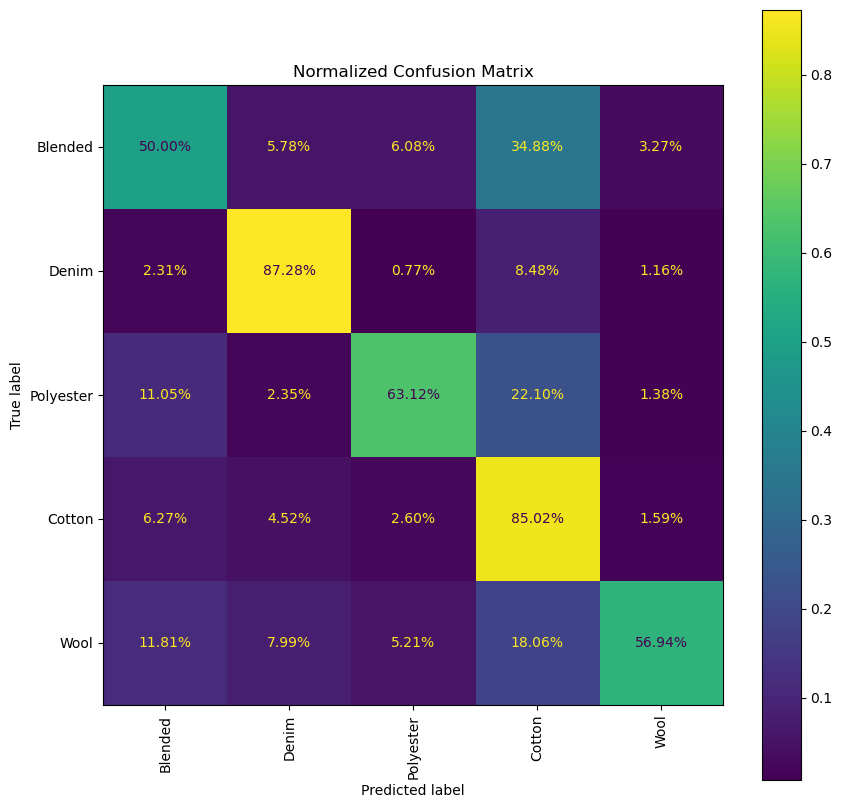

In [13]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix by row (i.e., by the number of samples in each actual class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

class_names = ['Blended', 'Denim', 'Polyester', 'Cotton', 'Wool']

# Plot normalized confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the figure size as necessary
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=class_names)

# To display percentage values in the plot, you need to enable include_values=True and adjust the formatting accordingly
disp.plot(include_values=True, cmap='viridis', ax=ax, xticks_rotation='vertical', values_format=".2%")  # values_format controls the numeric format

plt.title('Normalized Confusion Matrix')
plt.show()